In [4]:
import sys
sys.path.append("./../../src")
import os

print(sys.version)

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [10]:
from typing import List, Tuple
import numpy as np 
import pandas as pd
import pickle

import torch
from torch import nn, optim

In [11]:
from vae import VAE
from vae import VAETrainer
from config_reader import Config
from icd_analysis_helper import ICDAnalysisHelper
from visualizer_helper import Visualizer

In [12]:
config = Config('./config.ini')
config.__dict__

{'patient_icd_path': './../../data/PATIENT_ICD_BINARY_SPARSE_CSR.p',
 'icd9codes_path': '/data1/andrew/meng/mixehr/data/Mimic/mimic-iii-clinical-database-1.4/D_ICD_DIAGNOSES.csv.gz',
 'subject_ids_path': './../../data/PATIENT_ICD_SUBJECT_IDS.csv',
 'experiment_name': '200214_patient_similarity_clusters_default',
 'encoder_dim': [(250, 500), (500, 250), (250, 100)],
 'latent_dim': 25,
 'decoder_dim': [(250, 500), (500, 250), (250, 100)],
 'use_relu_encoder': True,
 'use_relu_decoder': True,
 'kld_beta': 1.0}

In [13]:
visualizer = Visualizer()

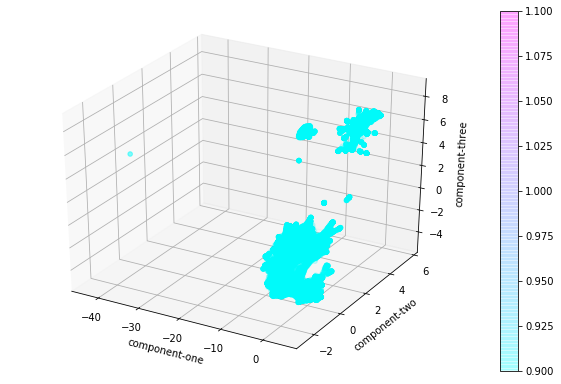

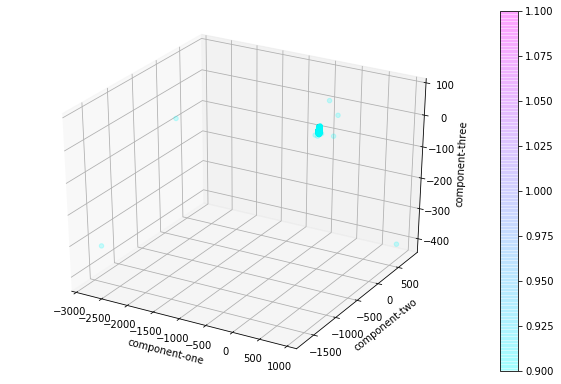

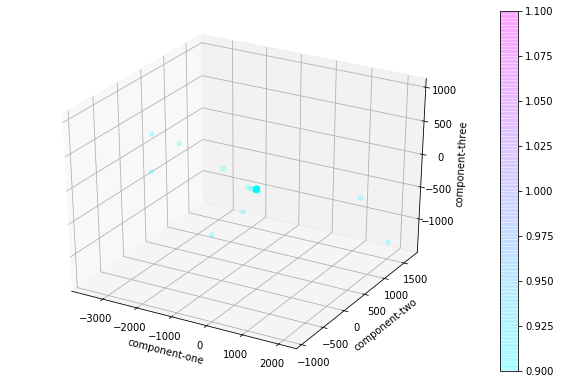

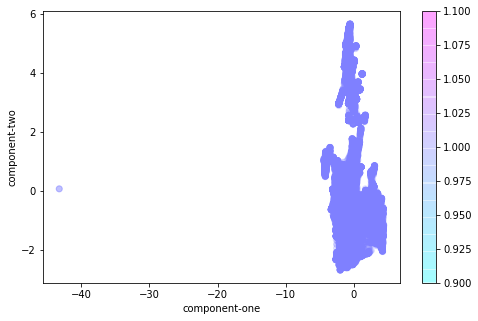

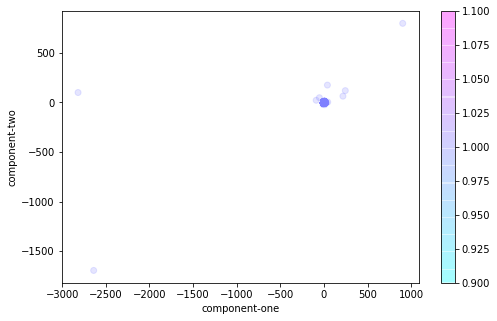

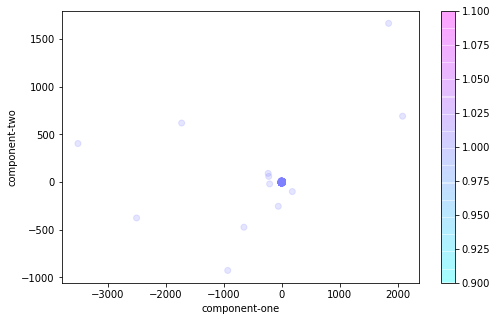

In [16]:
###Encode and plot 3d Data
epoch = 6
X_umap_3d = pickle.load(open("X_umap_3d.p", 'rb'))
mean_umap_3d = pickle.load(open("mean_umap_3d.p", 'rb'))
var_umap_3d = pickle.load(open("var_umap_3d.p", 'rb'))

alpha3d = 0.2

visualizer.plot3d(
    X=X_umap_3d, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "_all"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

visualizer.plot3d(
    X=mean_umap_3d, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "all_means"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

visualizer.plot3d(
    X=var_umap_3d, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "all_vars"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

visualizer.plot2d(
    X=X_umap_3d[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "_all_from_3d"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

visualizer.plot2d(
    X=mean_umap_3d[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "_all_means_from_3d"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

visualizer.plot2d(
    X=var_umap_3d[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(config.experiment_name, epoch, "_all_vars_from_3d"), 
    colors=[1 for i in range(X_umap_3d.shape[0])],
    alpha = alpha3d
)

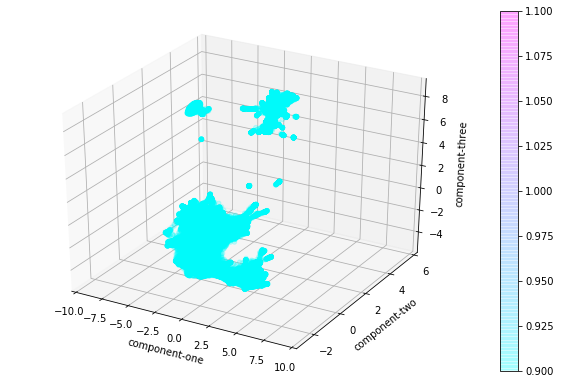

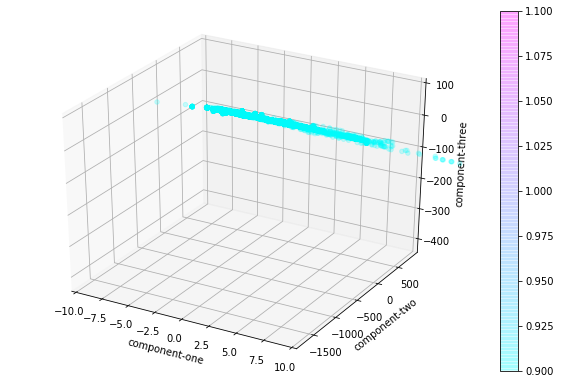

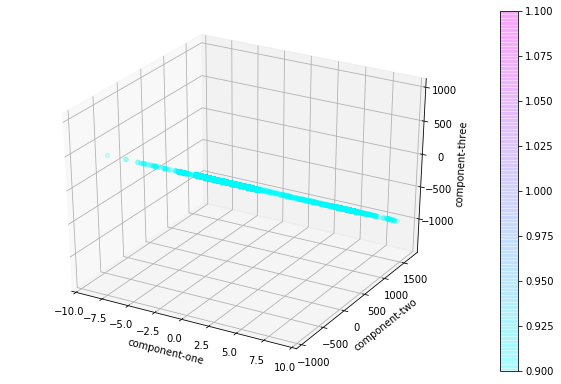

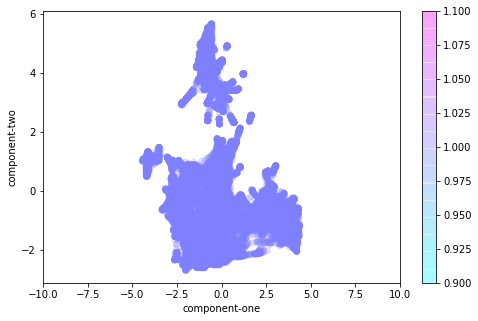

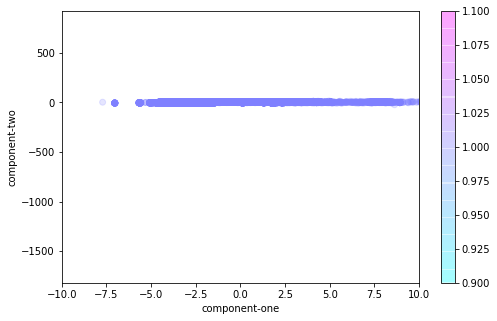

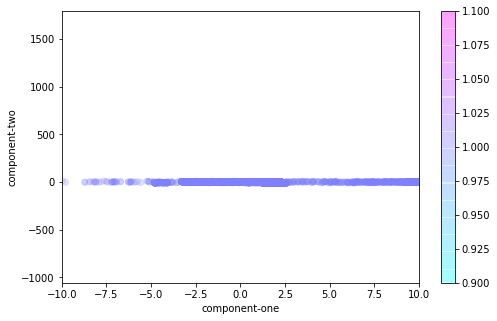

In [20]:
###Encode and plot 3d Data

X_umap_3d_v = X_umap_3d
mean_umap_3d_v = mean_umap_3d
var_umap_3d_v = var_umap_3d

experiment_name = config.experiment_name
alpha3d = 0.2

visualizer.plot3d(
    X=X_umap_3d_v, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d,
    xlim=(-10, 10),
#     ylim=(-10, 10)
)

visualizer.plot3d(
    X=mean_umap_3d_v, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_means_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d,
    xlim=(-10, 10),
#     ylim=(-10, 10)
)

visualizer.plot3d(
    X=var_umap_3d_v, 
    filename="Patient_Clusters_3D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_vars_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d,
    xlim=(-10, 10),
#     ylim=(-10, 10)
)

visualizer.plot2d(
    X=X_umap_3d_v[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_from_3d_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d, 
    xlim=(-10, 10),
#     ylim=(-10, 10)
)

visualizer.plot2d(
    X=mean_umap_3d_v[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_means_from_3d_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d,
    xlim=(-10, 10),
#     ylim=(-10, 10)
)

visualizer.plot2d(
    X=var_umap_3d_v[:, :-1], 
    filename="Patient_Clusters_2D_exp_{}_epoch_{}{}".format(experiment_name, epoch, "_all_vars_from_3d_no_outlier"), 
    colors=[1 for i in range(X_umap_3d_v.shape[0])],
    alpha = alpha3d, 
    xlim=(-10, 10),
#     ylim=(-10, 10)
)